# __Cogs 108 Final Project__

# __Overview__

The coronavirus has disrupted life in America. With more Americans isolating from each other due to stay at home orders, we expect to see a decline in crime rates. Our project aims to investigate how pre-emptive quarantine measures in San Francisco affect crime rates. We found that there was a significant decline in crime rates once mandated stay at home at orders were implemented. 

# __Names__

- Alexandra Keamy
- Joey Fallon
- Jon Zhang
- Nathan Au
- Paul Kim



# __Research Question__

Do preemptive quarantine procedures in San Francisco lead to a decrease in crime rates? 

# __Background Research and Prior Work__

Since the emergence of the COVID-19 crisis, Americans have had to adapt to a new way of life. San Francisco was one of the first cities to issue a mandated stay at home order on March 17 [5]. With mandated quarantines and social distancing, it has been reported that law enforcement has seen a dip in criminal activity. According to US News, homicide in Chicago dropped 29% the week of March 21 [1]. The city is known for its high crime rates, but is experiencing a large decrease in criminal activity. It is reported that during the week of March 16th, theft in San Francisco dropped 60%. Burglaries are on the decline, since most burglars target empty houses. Crime rates are being affected in a similar way when 9/11 happened [2]. There was a decrease in crimes during that time, because the general public was scared and stayed home. However, not all crimes are believed to have decreased since the COVID-19 outbreak. When looking at the 5 biggest cities in the United States, it has shown that there has been an increase in domestic violence related crime [3]. The National Domestic Violence Hotline has reported a surge in calls since the pandemic.  <br>

References (include links): <br>
1) https://www.usnews.com/news/national-news/articles/2020-03-30/coronavirus-quarantines-spark-drop-in-crime-for-now <br>
2) https://www.themarshallproject.org/2020/03/27/as-coronavirus-surges-crime-declines-in-some-cities <br>
3)https://www.economist.com/graphic-detail/2020/04/22/domestic-violence-has-increased-during-coronavirus-lockdowns <br>
4) https://time.com/5819507/crime-drop-coronavirus/ <br>
5) https://www.nbcbayarea.com/news/local/san-francisco/sf-mayor-announces-program-to-aid-workers-amid-coronavirus-pandemic/2255316/ <br>
6) https://www.nbcbayarea.com/news/local/san-francisco/sf-mayor-announces-program-to-aid-workers-amid-coronavirus-pandemic/2255316/ <br>

# __Hypothesis__

Cities that mandated early stay at home orders will have a decrease in crime rates. This is because the general public is scared to go out in public because of the risk of contracting COVID-19. Burglars also tend to target homes that are empty, however, people are now required to stay at home so we expect to seea decrease in burglaries. 

# __Dataset__

We gathered data from San Francisco. We collected data of incident reports that occured during February- March of 2018, 2019, and 2020. The San Francisco dataset contained 51,041 observations. It contains features regarding the incident number, type of crime, description of the crime, the day of the week, date, time, police district, and location. 

San Francisco Dataset Source: https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD <br>

# __Setup__

In [56]:
# Libraries 
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import time
import scipy
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Tools
from tqdm import tqdm
from scipy import stats

# Style
plt.style.use('seaborn-deep')
sys.path.insert(0,'../src')
sys.path.insert(0,'../data')
#sys.path.insert(0,'../upload_data')
#sys.path.insert(0,'../config')
sys.path.insert(0,'..')
%matplotlib inline

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
import etl
from etl import *

In [12]:
TOP_PATH = os.environ['PWD']
#la_df = pd.read_csv('https://data.lacity.org/api/views/63jg-8b9z/rows.csv?accessType=DOWNLOAD',)

In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
%reload_ext autoreload

In [16]:
def get_present_sf():
    cols = ['Incident Date', 'Incident Time', 'Incident Day of Week','Incident Number',
           'Incident Category', 'Incident Description','Police District',
           'Latitude', 'Longitude','point']
    raw_sf_csv = pd.read_csv('https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD',parse_dates=[0,1],infer_datetime_format=True, usecols=cols)
    corona_df = raw_sf_csv[
        (raw_sf_csv['Incident Datetime'] >= pd.to_datetime('02-01-2018')) & (raw_sf_csv['Incident Datetime'] <= pd.to_datetime('04-01-2018'))|
        (raw_sf_csv['Incident Datetime'] >= pd.to_datetime('02-01-2019')) & (raw_sf_csv['Incident Datetime'] <= pd.to_datetime('04-01-2019'))|
        (raw_sf_csv['Incident Datetime'] >= pd.to_datetime('02-01-2020')) & (raw_sf_csv['Incident Datetime'] <= pd.to_datetime('04-01-2020'))]
    corona_df = corona_df.rename(columns={'Incident Date': 'Date', 'Incident Time':'Time', 'Incident Day of Week':'DayOfWeek','Incident Number':'IncidentNum',
           'Incident Category': 'Category', 'Incident Description':'Description','Police District':'PoliceDistrict'})
    return corona_df

In [17]:
def get_hist_sf():
    cols = ['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'X', 'Y', 'Location']
    iter_csv = pd.read_csv('https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD', iterator=True, chunksize=1000, parse_dates=[4,5],infer_datetime_format=True, usecols=cols)
    hist_df = pd.concat([chunk[
            (chunk['Date'] >= pd.to_datetime('02-01-2018')) & (chunk['Date'] <= pd.to_datetime('04-01-2018'))|
            (chunk['Date'] >= pd.to_datetime('02-01-2019')) & (chunk['Date'] <= pd.to_datetime('04-01-2019'))|
            (chunk['Date'] >= pd.to_datetime('02-01-2020')) & (chunk['Date'] <= pd.to_datetime('04-01-2020'))] for chunk in tqdm(iter_csv)])
    hist_df = hist_df.rename(columns={'IncidntNum':'IncidentNum', 'Descript': 'Description','PdDistrict': 'PoliceDistrict', 'X':'Latitude', 'Y':'Longitude', 'Location':'point'})
    return hist_df


In [19]:
sf_df = etl.get_sf_data()
sf_raw = etl.get_sf_data()

# __Data Cleaning__

Firstly, we wanted to observe what the size of our dataset was and the types of data were in each column so we could clean them appropriately. Printing out the size and datatypes provided us information on what we were looking for in our San Francisco dataframe.

In [20]:
print( 'SIZE:', len(sf_df) )

SIZE: 51041


In [21]:
sf_df.head()

,Category,Date,DayOfWeek,Description,IncidentNum,Latitude,Longitude,PoliceDistrict,Time,point
0,ASSAULT,2018-03-20,Tuesday,BATTERY,180210729,-122.424860,37.786196,NORTHERN,2020-06-10 18:20:00,POINT (-122.42485988902867 37.78619644725339)
1,LARCENY/THEFT,2018-02-24,Saturday,PETTY THEFT SHOPLIFTING,179008242,-122.407634,37.784189,SOUTHERN,2020-06-10 17:57:00,POINT (-122.4076335207421 37.78418935014246)
2,NON-CRIMINAL,2018-02-02,Friday,"STAY AWAY OR COURT ORDER, NON-DV RELATED",180089411,-122.396251,37.785258,SOUTHERN,2020-06-10 13:45:00,POINT (-122.3962513959873 37.78525828576994)
3,BURGLARY,2018-02-03,Saturday,"BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY",180090468,-122.387924,37.763727,BAYVIEW,2020-06-10 06:03:00,POINT (-122.38792362264701 37.76372692227848)
4,BURGLARY,2018-02-01,Thursday,"BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY",180087716,-122.484733,37.781044,RICHMOND,2020-06-10 14:00:00,POINT (-122.48473280979714 37.78104369492346)


In order to tidy our data, we made our dataset cleaning function "sf_clean()" to perform three main arguments. We normalized our cases to lowercase through manual tokenization and made our crimes binary categorized as "violent" and "nonviolent". To ensure to receive legitimate data and properly label violent crimes, we used the definitons  of violent crimes defined by the National Institute of Justice. We then changed the time into military time and deleted the dates. We then ran function back.

In [22]:
def sf_clean(df):
    
    # making string columns lower case
    for col in ['Category', 'DayOfWeek', 'Description', 'PoliceDistrict']:
        df[col] = df[col].str.lower()
    
    # binary category column
    violent = ['assault', 'robbery','rape', 'homicide'] # defined by the National Institute of Justice
    nonviolent = [i for i in df.Category.unique() if i not in violent]
    def binarizer(string):
        if string == 'nan':
            return string
        elif string in violent:
            return 'violent'
        else:
            return 'nonviolent'
    df.Category = df.Category.apply(binarizer)
    
    # Correcting time column 
    df.Time = df.Time.dt.strftime('%X')
    
    return df

sf_clean = sf_clean(sf_df)

To further clean our data, we wanted to view and get rid of any missingness or null values. We hypothesized maybe that some locations weren't placed by law enforcement agents by accident, so to standardize everything we decided to drop all null rows that didn't provide longitude and latitudes values. We then called for the shape of our dataset to compare the longitude and latitude values across the other columns to make sure we made our data consistent.

Note: The .html we saw in the dataset is inherent to the webpage and not actually within a cell in our dataset.

In [23]:
# Assessing Missingness

print('\'sf_clean\' WITH NULL VALUES\n')
sf_clean.info()

# Dropping null rows without location 
sf_clean.dropna(inplace=True)
print('\n\n_______________________________________\n\'sf_clean\' WITHOUT NULL VALUES\n\n')
sf_clean.info()
sf_clean.shape

'sf_clean' WITH NULL VALUES

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51041 entries, 0 to 89643
Data columns (total 10 columns):
Category          51041 non-null object
Date              51041 non-null datetime64[ns]
DayOfWeek         51041 non-null object
Description       51041 non-null object
IncidentNum       51041 non-null int64
Latitude          48859 non-null float64
Longitude         48859 non-null float64
PoliceDistrict    51041 non-null object
Time              51041 non-null object
point             48859 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 4.3+ MB


_______________________________________
'sf_clean' WITHOUT NULL VALUES


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48859 entries, 0 to 89643
Data columns (total 10 columns):
Category          48859 non-null object
Date              48859 non-null datetime64[ns]
DayOfWeek         48859 non-null object
Description       48859 non-null object
IncidentNum       48

(48859, 10)

## Seperating DataFrame by Year

Since we standardized our dataset's time, we then easily compared our dataset by sectioning the data by year. Beginning with 2018, we wanted to see if there were any changes in the 2020 category to support our hypothesis if the COVID-19 pandemic decreased crime rate amount.

In [24]:
# 2018 crime data
sf_18 = sf_clean[np.logical_and(
    sf_clean['Date'] >= dt.datetime(2018,1,1), 
    sf_clean['Date'] < dt.datetime(2019, 1, 1)
)]

# 2019 crime data
sf_19 = sf_clean[np.logical_and(
    sf_clean['Date'] >= dt.datetime(2019,1,1), 
    sf_clean['Date'] < dt.datetime(2020, 1, 1)
)]

# 2020 crime data
sf_20 = sf_clean[np.logical_and(
    sf_clean['Date'] >= dt.datetime(2020,1,1), 
    sf_clean['Date'] < dt.datetime(2021, 1, 1)
)]


# __Data Analysis & Results__

In [25]:
# 2018 crime data
sf_18_raw = sf_raw[np.logical_and(
    sf_raw['Date'] >= dt.datetime(2018,1,1), 
    sf_raw['Date'] < dt.datetime(2019, 1, 1)
)]

# 2019 crime data
sf_19_raw = sf_raw[np.logical_and(
    sf_raw['Date'] >= dt.datetime(2019,1,1), 
    sf_raw['Date'] < dt.datetime(2020, 1, 1)
)]

# 2020 crime data
sf_20_raw = sf_raw[np.logical_and(
    sf_raw['Date'] >= dt.datetime(2020,1,1), 
    sf_raw['Date'] < dt.datetime(2021, 1, 1)
)]



In [26]:
# Get top 10 crimes for 2018
crime_2018_raw = sf_18_raw.Category.value_counts()
prop_2018_raw = crime_2018_raw / len(sf_18_raw)
prop_2018_raw = pd.DataFrame(prop_2018_raw)[0:10]

# Get top 10 crimes for 2019
crime_2019_raw = sf_19_raw.Category.value_counts()
prop_2019_raw = crime_2019_raw / len(sf_19_raw)
prop_2019_raw = pd.DataFrame(prop_2019_raw)[0:10]

# Get top 10 crimes for 2020 
crime_2020_raw = sf_20_raw.Category.value_counts()
prop_2020_raw = crime_2020_raw / len(sf_20_raw)
prop_2020_raw = pd.DataFrame(prop_2020_raw)[0:10]

Text(0, 0.5, 'Type of Crime')

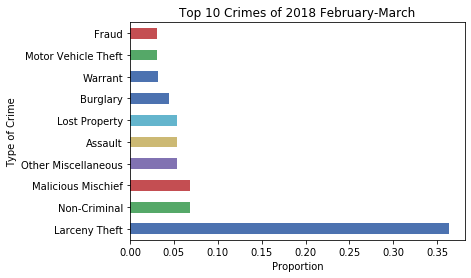

In [27]:
prop_2019_raw.Category.plot.barh()
plt.title('Top 10 Crimes of 2018 February-March')
plt.xlabel('Proportion')
plt.ylabel('Type of Crime')

Text(0, 0.5, 'Type of Crime')

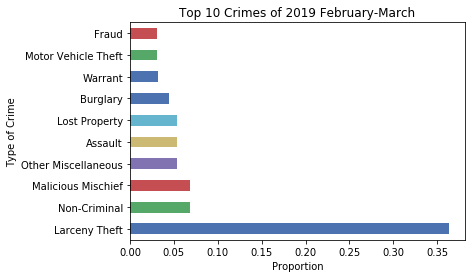

In [28]:
prop_2019_raw.Category.plot.barh()
plt.title('Top 10 Crimes of 2019 February-March')
plt.xlabel('Proportion')
plt.ylabel('Type of Crime')

Text(0, 0.5, 'Type of Crime')

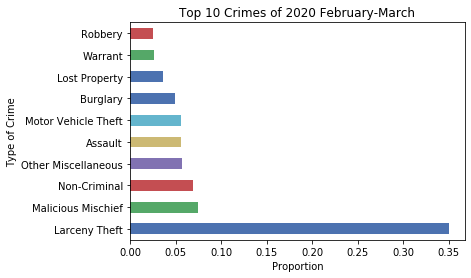

In [29]:
prop_2020_raw.Category.plot.barh()
plt.title('Top 10 Crimes of 2020 February-March')
plt.xlabel('Proportion')
plt.ylabel('Type of Crime')

These bar plots are displaying the top 10 crimes for 2018, 2019, and 2020 between February and March. Larceny theft was the most common crime for 2018, 2019, and 2020. The plots for 2018 and 2019 are nearly identical, as they share similar distributions for the top 10 crimes. 2020 appears to be very similar to 2018 and 2019, but had a larger proportion of malicious mischief and motor vehicle theft. The proportion of crimes that are burglary for 2018, 2019, and 2020 are similar.

### Univariate

In [30]:
crime_2018 = sf_18.Category.value_counts()
prop_2018 =  np.round((crime_2018 / len(sf_18)) * 100, 2)

pd.DataFrame(prop_2018).rename(columns={'Category': 'Percentage'})

,Percentage
nonviolent,90.09
violent,9.91


In [31]:
crime_2019 = sf_19.Category.value_counts()
prop_2019 =  np.round((crime_2019 / len(sf_19)) * 100, 2)

pd.DataFrame(prop_2019).rename(columns={'Category': 'Percentage'})

,Percentage
nonviolent,92.38
violent,7.62


In [32]:
crime_2020 = sf_20.Category.value_counts()
prop_2020 =  np.round((crime_2020 / len(sf_20)) * 100, 2)

pd.DataFrame(prop_2020).rename(columns={'Category': 'Percentage'})

,Percentage
nonviolent,91.33
violent,8.67


We created a barchart dataframe to plot the nonviolent and violent crimes by year. We can then easily observe and compare the annual crime rates between March-May.

,2018,2019,2020
Nonviolent,16724,14634,13202
Violent,1839,1207,1253


(array([0, 1]), <a list of 2 Text xticklabel objects>)

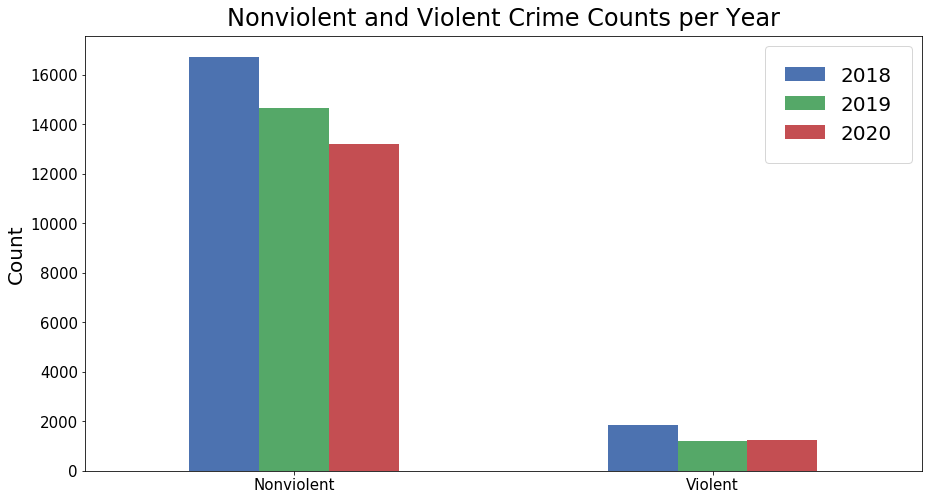

In [33]:
# Creating Dataframe for plot
data = {
    '2018': crime_2018.values,
    '2019': crime_2019.values,
    '2020': crime_2020.values
}
plt_df = pd.DataFrame(data, index= ['Nonviolent', 'Violent'])
display(plt_df)

# Plotting grouped bar chart
plt_df.plot(
    kind='bar',
    figsize=(15,8),
    fontsize = 15,
)

plt.ylabel('Count', fontsize=20)
plt.title('Nonviolent and Violent Crime Counts per Year', fontsize=24, y=1.01)
plt.legend(fontsize=20, borderpad=1)
plt.xticks(rotation=0, ha='center')

This bar plot is displaying the nonviolent and violent crime counts per year. There is a significant decrease in nonviolent in 2020 when compared to 2018 and 2019. The count of violent crimes in 2019 and 2020 appear to be similar. There's a downwards trend in the count of nonviolent crimes where as the violent crimes seem to be similar in 2019 and 2020.

#### Choropleth

In [35]:
def make_choropleth(df):
    
    def create_shapes():
        districts = gpd.read_file('https://data.sfgov.org/api/geospatial/wkhw-cjsf?method=export&format=Shapefile')
        districts = districts.drop(['company', 'shape_area', 'shape_le_1', 'shape_leng'],axis = 1)
        districts['district'] = districts["district"].str.lower()
        return districts
    districts = create_shapes()
    
    ### create pivot table of counts and police district
    df = sf_clean.groupby('PoliceDistrict').agg('count')
    df = df[['IncidentNum']]
    ### Merge the shapes and police districts
    merged=districts.merge(df, right_index=True,left_on='district', how='outer').dropna()
    merged=merged.set_index('district')
    ### Plot the whole thing
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    ax.set_title('Crimes in each SF Police District', fontdict={'fontsize':'15','fontweight' : '3'})
    merged.plot(column='IncidentNum', cmap='Blues', linewidth=0.8, ax=ax,edgecolor='0.8',
                vmin=0, vmax=merged.IncidentNum.max(), legend=True)

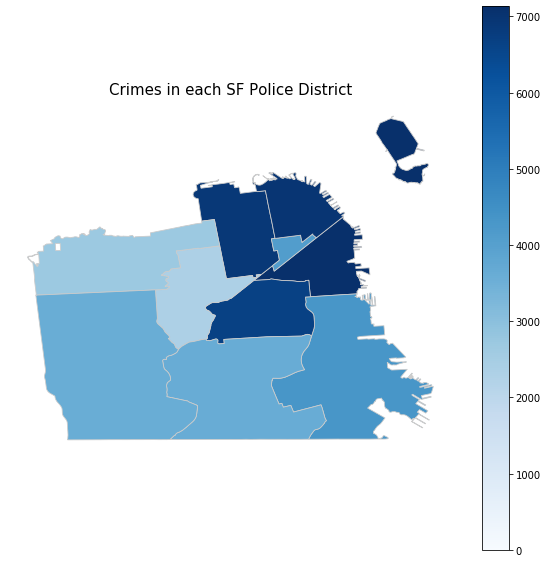

In [37]:
make_choropleth(sf_clean)

The choropleth plot is showing the  count of crimes in each SF police district.  Seems that crime is most popular near the top of the graph, and there's a large portion of the graph that is clumped with dark-blue, meaning more counts of crime.

### Bivariate

To really visualize the data we're looking for, we added a total crime counts plotted against the date for the three years we decided to observe. We can observe in the 2020 dataframe the crimes have dropped significantly once quarantine measures began being enacted.

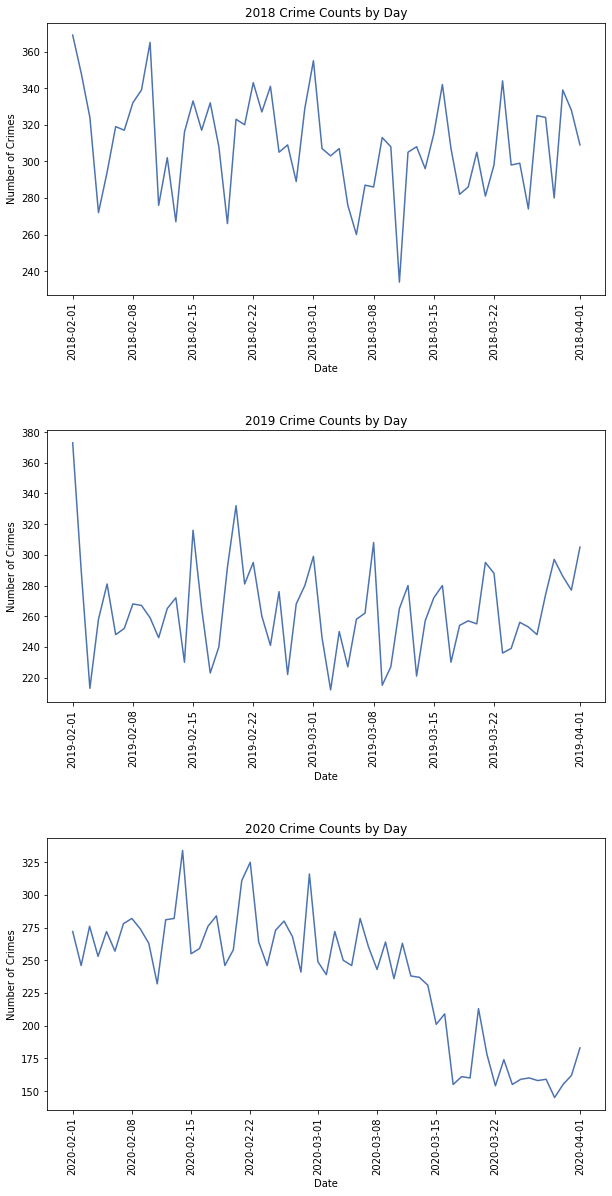

In [38]:
# Crime counts plotted against date

# 2018 
x1 = sf_18.groupby('Date').count()['Category'].index
y1 = sf_18.groupby('Date').count()['Category'].values

# 2019
x2 = sf_19.groupby('Date').count()['Category'].index
y2 = sf_19.groupby('Date').count()['Category'].values

# 2020
x3 = sf_20.groupby('Date').count()['Category'].index
y3 = sf_20.groupby('Date').count()['Category'].values

fig = plt.figure()
fig.set_size_inches(10,20)
fig.subplots_adjust(hspace=.5, wspace=.1)

ax = fig.add_subplot(3,1,1)
ax.set_title('2018 Crime Counts by Day')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation = 90)
sns.lineplot(x=x1, y=y1)

ax = fig.add_subplot(3,1,2)
ax.set_title('2019 Crime Counts by Day')
ax.set_ylabel('Number of Crimes')

plt.xticks(rotation = 90)
sns.lineplot(x=x2, y=y2)

ax = fig.add_subplot(3,1,3)
ax.set_title('2020 Crime Counts by Day')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation = 90)
sns.lineplot(x=x3, y=y3)

To further describe what our previous dataframe showcased, we created a crime counts formatted exactly the same except we specifically wanted to observe the nonviolent crime counts against the date. If we take a look at the 2020 Crime Counts A Day chart, there's an exponential decrease in crime counts per day between the points (2020-03-09) and (2020-03-22), which about a week and a half. However, crime rate seems to be going back up entering into April.

We created another crime counts formatted exactly the same as the others, but this time with violent crime counts only.

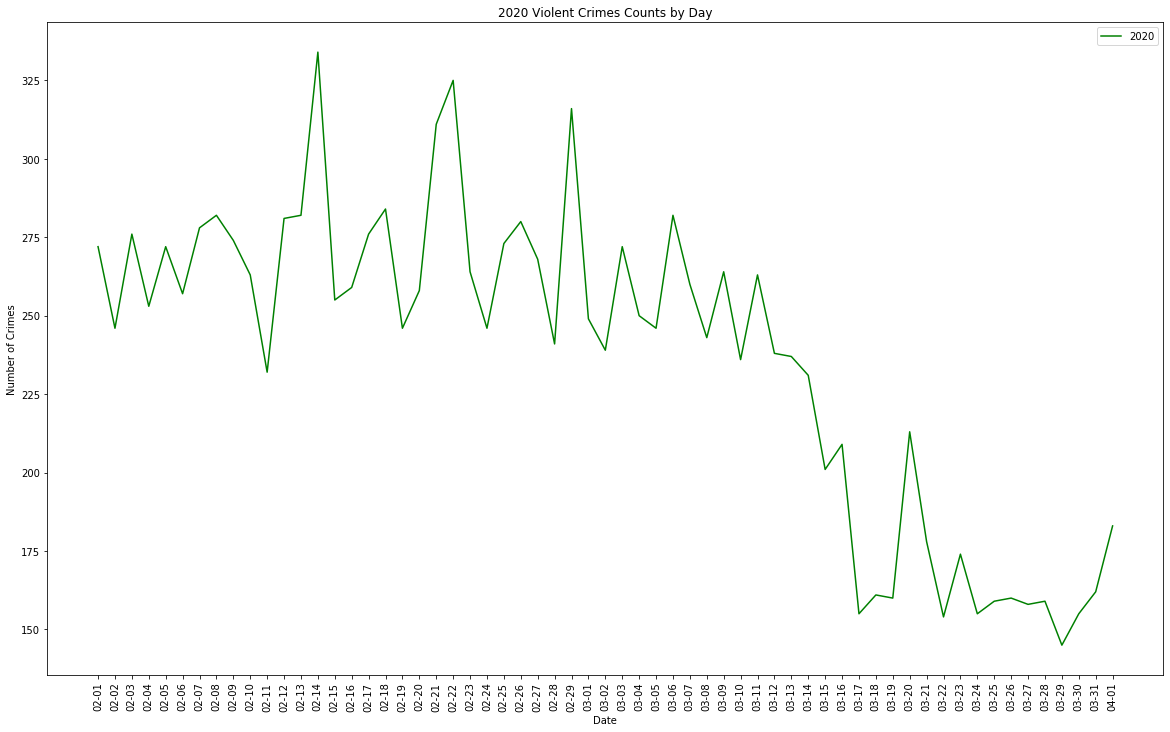

In [62]:
sf_18_violent = sf_18[sf_18.Category != 'nonviolent']
sf_19_violent = sf_19[sf_19.Category != 'nonviolent']
sf_20_violent = sf_20[sf_20.Category != 'nonviolent']
sf_20_violent = sf_20_violent[sf_20_violent['Date'].dt.strftime('%Y-%m-%d') != '2020-02-29']

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# 2018 

# 2020
x3 = sf_20.groupby('Date').count()['Category'].index.strftime("%m-%d")
y3 = sf_20.groupby('Date').count()['Category'].values

fig = plt.figure()
fig.set_size_inches(20,12)
# Ensure a major tick for each week using (interval=1) 
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xticks(rotation = 90)
sns.lineplot(x=x3, y=y3, color="green", label = "2020")
plt.title("2020 Violent Crimes Counts by Day")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.show()

This plot is displaying the Violent Crime Count by day. During the month of March, violent crimes starts to decrease. There is a huge sever negative slope dropdown around the time of the mandated stay at home orders (March 17th). Nonviolent along with violent crimes both saw rates plummet as people were not willing to risk catching a potentially deadly virus. However, that's not to say that crime will stagnate at the lowest point, because the data doesn't take into account relevant events such as all the rioting going on right now. Crime rate could be influenced based on that, either negatively or positively.

### THESIS: Does preemptive quarantine procedures affect crime rate
ANALYSIS: We will use the 2018 / 2019 crime data to create a regression line of what we would have expected the crime rates to be in March/April of 2020 and compare that against the actual data. We will use a T-Test to assess if there is a signicant difference after quarentining.

In [44]:
# Setting data to build the regression line
sf_r_18 = sf_18.copy()
sf_r_19 = sf_19.copy()

# Standardizing Time series Data

# 2018 ---- days between 1970 and 2018: 17532
sf_r_18['DaysEllapsed'] = pd.to_timedelta(sf_r_18['Date'])
sf_r_18.DaysEllapsed = sf_r_18.DaysEllapsed.apply(lambda x: int(str(x).split()[0]) - 17532 )
print('------------------------------ 2018 Standardized ------------------------------')
display(sf_r_18.head())

# 2019 ---- days between 1970 and 2019: 17897
sf_r_19['DaysEllapsed'] = pd.to_timedelta(sf_r_19['Date'])
sf_r_19.DaysEllapsed = sf_r_19.DaysEllapsed.apply(lambda x: int(str(x).split()[0]) - 17897 )
print('------------------------------ 2019 Standardized ------------------------------')
display(sf_r_19.head())

------------------------------ 2018 Standardized ------------------------------


,Category,Date,DayOfWeek,Description,IncidentNum,Latitude,Longitude,PoliceDistrict,Time,point,DaysEllapsed
0,violent,2018-03-20,tuesday,battery,180210729,-122.424860,37.786196,northern,18:20:00,POINT (-122.42485988902867 37.78619644725339),78
1,nonviolent,2018-02-24,saturday,petty theft shoplifting,179008242,-122.407634,37.784189,southern,17:57:00,POINT (-122.4076335207421 37.78418935014246),54
2,nonviolent,2018-02-02,friday,"stay away or court order, non-dv related",180089411,-122.396251,37.785258,southern,13:45:00,POINT (-122.3962513959873 37.78525828576994),32
3,nonviolent,2018-02-03,saturday,"burglary of apartment house, forcible entry",180090468,-122.387924,37.763727,bayview,06:03:00,POINT (-122.38792362264701 37.76372692227848),33
4,nonviolent,2018-02-01,thursday,"burglary of apartment house, unlawful entry",180087716,-122.484733,37.781044,richmond,14:00:00,POINT (-122.48473280979714 37.78104369492346),31


------------------------------ 2019 Standardized ------------------------------


,Category,Date,DayOfWeek,Description,IncidentNum,Latitude,Longitude,PoliceDistrict,Time,point,DaysEllapsed
21247,nonviolent,2019-02-03,sunday,"vehicle, recovered, motorcycle",200073358,37.785976,-122.451240,richmond,17:45:00,"(37.78597619318757, -122.45124037129443)",33
21276,nonviolent,2019-02-04,monday,indecent exposure (adult victim),200088197,37.773210,-122.470163,richmond,14:00:00,"(37.77320950938174, -122.47016269274262)",34
21482,nonviolent,2019-02-14,thursday,terrorist threats,200086862,37.763576,-122.428575,mission,12:00:00,"(37.763576332444025, -122.42857510738612)",44
21841,nonviolent,2019-02-11,monday,"access card, incl. credit, phone, atm, fraudul...",209000241,37.773467,-122.391434,out of sf,13:04:00,"(37.773466920607476, -122.39143433652146)",41
21979,nonviolent,2019-02-01,friday,"access card, incl. credit, phone, atm, fraudul...",200092217,37.764084,-122.465245,taraval,12:00:00,"(37.76408377666852, -122.46524489663481)",31


In [45]:
# Crime counts group by days ellapsed
crime_counts_18 = (
    sf_r_18
    .groupby('DaysEllapsed')
    .count().Category
    .to_frame()
    .rename(columns={'Category': 'CrimeCounts'})
)

crime_counts_19 = (
    sf_r_19
    .groupby('DaysEllapsed')
    .count().Category
    .to_frame()
    .rename(columns={'Category': 'CrimeCounts'})
)
mean_CrimeCount = crime_counts_19.CrimeCounts + crime_counts_19.CrimeCounts / 2
mean_CrimeCount = mean_CrimeCount.to_frame()
mean_CrimeCount.head()

,CrimeCounts
DaysEllapsed,
31,559.5
32,433.5
33,319.5
34,387.0
35,421.5


Text(0.5, 1.01, 'Regression Line (2nd Degree) Plotted on Crime Count vs. Days Ellapsed')

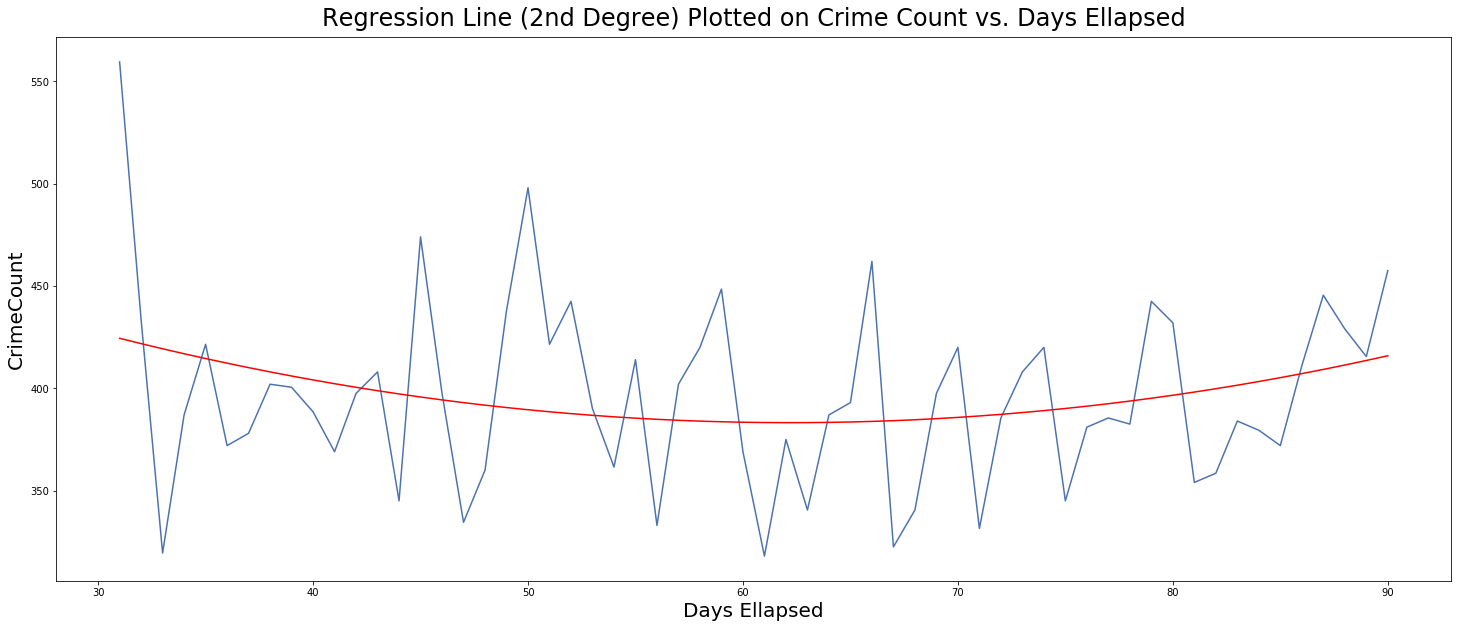

In [46]:
# Building the Regression Line
x_vals = np.array(range(31, 91)) # days ellapsed
y_vals = mean_CrimeCount.CrimeCounts
m, m1, b = np.polyfit(x_vals, y_vals, 2)

plt.figure(figsize=(25,10))
plt.plot(x_vals, y_vals)
plt.plot(x_vals, m*pow(x_vals, 2) + m1*x_vals + b, color='red')
plt.ylabel('CrimeCount', fontsize=20)
plt.xlabel('Days Ellapsed', fontsize=20)
plt.title(
    'Regression Line (2nd Degree) Plotted on Crime Count vs. Days Ellapsed', 
    fontsize=24, 
    y=1.01
)

In the above plot: 
- The blue line represents the mean of the crime counts per day between both 2018 and 2019
- The red line is the regression line in the 2nd degree.

Summary: To predict the data for months of 2020, we will fit a line on the means of 2018 and 2019 data using poly function of numpy. We can fit on any degree but we chose to go with degeee 2.

Poly Degree = 2 means it will be line y = m2*x^2 +m1*x + c
Using the data from 2018 and 2019, we grouped the data frames by the days ellasped from the beginning of the year. This step was crucial because this allowed us to standardize the data between the years. Date time objects are difficult to work with and they are parsed as strings. By doing this we were able to create a predictor variable for our regression. We then found the coefficents of for the regression by the means of the crime counts between 2018 and 2019.

Graphically, the plot follows the trend described in the in the crime count plots in the EDA section. Once, again we notice that the data is volatile and we took this into account by choosing a regression of degree 2. By doing so, we can capture more information than a linear regression and capture the general trend of the data more accurately. While we could have chosen a higher degree and fit the data better, we would lose the overall trend. The smoothness of the regression line grants us a more intuitive description of the mean data.

Finally we predicted for 2020 using the same function.

In [47]:
# Predictions 
prediction_2020 = np.round(m*pow(x_vals, 2) + m1*x_vals + b).astype('int64')
pred_df = pd.DataFrame(
    data = {
        'Days Ellapsed': list(np.arange(30,90)),
        '2020 Predicted Crime Count': prediction_2020
           }
).set_index('Days Ellapsed')
pred_df.head()

,2020 Predicted Crime Count
Days Ellapsed,
30,424
31,422
32,419
33,417
34,415


# T-Test

$H_{0}$: There is no significant difference between the observed crime count and the expected crime count. <br>
$H_{1}$: There is a significant difference between the observed crime count and the expected crime count. <br>
__Alpha Value:__ 0.05


In [51]:
# Getting the 2020 Crime Counts
sf_r_20 = sf_20.copy()

# Number of days between 2020 and 1970: 18262
sf_r_20['DaysEllapsed'] = pd.to_timedelta(sf_r_20['Date'])
sf_r_20.DaysEllapsed = sf_r_20.DaysEllapsed.apply(lambda x: int(str(x).split()[0]) - 18262 )

crime_counts_2020 = (
    sf_r_20
    .groupby('DaysEllapsed')
    .count()
    .Category
    .to_frame()
    .rename(columns={'Category': 'CrimeCounts'})
)


In [52]:
obs = np.array(crime_counts_2020.CrimeCounts)
exp = np.append(np.array(prediction_2020), int(m*pow(91, 2) + m1*91 + b))

print('Observed Values ---------------------------------- \n', obs, '\n')
print('Expected Values ---------------------------------- \n', exp)

Observed Values ---------------------------------- 
 [272 246 276 253 272 257 278 282 274 263 232 281 282 334 255 259 276 284
 246 258 311 325 264 246 273 280 268 241 316 249 239 272 250 246 282 260
 243 264 236 263 238 237 231 201 209 155 161 160 213 178 154 174 155 159
 160 158 159 145 155 162 183] 

Expected Values ---------------------------------- 
 [424 422 419 417 415 412 410 408 406 404 402 400 399 397 396 394 393 392
 391 390 389 388 387 386 385 385 384 384 384 383 383 383 383 383 384 384
 384 385 385 386 386 387 388 389 390 391 392 394 395 397 398 400 402 403
 405 407 409 411 414 416 418]


In [53]:
results = stats.ttest_ind(obs, exp)

print(results)
print('P-Value: ', results[1])

Ttest_indResult(statistic=-24.27905705328477, pvalue=3.941809475562597e-48)
P-Value:  3.941809475562597e-48


__Discussing the Results:__ 
Given that our resulting p-value is much less than the alpha (0.05) chosen, we can confidently state that the differences between the observed crime rate and the actual crime rate did not happen by chance. Therefore, we reject the null hypothesis in favor of the null. Given the crime count line charts previously plotted, this should not come as a big surprise. Incidentally, sheltering-in-place has an effect on the crime rate of an area.



# __Ethics & Privacy__

City police incident reports are accessible online to the public, and the police reports are very detailed displaying exact addresses where calls are coming from. To protect the identity and safety of people calling (because the identity of a person can be revealed based on an address), we will drop these columns and only use the City, State, and Zip-code. This will prevent private information from being exposed and spread on the internet. We will not include any names of individuals and will actively prevent revealing the identity of any individuals involved. 
Protecting the identities of the reports also drops information unnecessary to our thesis as well as avoiding any potential biases regarding racial prejudice.

# __Conclusion & Discussion__

With COVID-19 forcing Americans to quarantine themselves due to stay-at-home orders, we predicted that there would be a significant decrease in crime rates among metropolitan cities. So, we decided to study San Francisco, one of the five largest cities in the United States. Due to citizens staying at home, we hypothesized criminals would be less likely to go outside due to quarantine stay at home orders and/or be discouraged from performing crimes like burglary or theft due to an increase of people staying in their homes. With our gathered data, we discovered that there was indeed a significant decline in crime rates once the mandated stay at home orders were implemented.

To discover if our hypothesis remained true in accordance to ethical practices, we dropped personal information as a part of cleaning up our dataset. After normalizing our cases, dropping all null values, making crimes binary, and changing time displays, we were then able to begin separating our data by years 2018, 2019, and 2020 so we can find some discrepancy in crime rates between March-May. We plotted our univariate data to provide visualization on the types of crime data we gathered, between non-binary to binary (binary meaning nonviolent and violent crimes), discover the crime report percentages between each other, and base them by counts per year. A choropleth plot was developed to see the regions of crime report intensities. With univariate data in play, we were then able to generate results by displaying the bivariate data of total crime counts by day, nonviolent crime counts by day, and violent crime counts by day. All plots showed in the beginning of March a sudden drop in crime rates, which was also the beginning of stay-at-home orders. Finally, we applied the T-test to prove that the relationship didn’t happen by chance.

The reduction of crime reports correlating to the stay-at-home orders can suggest multiple points: nonviolent crimes may be lessened due to closed businesses, and violent crimes may be reduced because of displaced and isolated populations.

# __Team Contributions__

- Alexandra Keamy: proposal, research question, background research, hypothesis, ethics and privacy, exploratory data analysis
- Joey Fallon- EDA, EDA literacy, T-test, Regression, Data Cleaning, Statistical Hypothesis, Univariate Analysis, Bivariate Analysis, Seperating Data, Handling Time Series Data
- Jon Zhang: data analysis- linear regression, writing results
- Nathan Au: data ingestion, data cleaning, chloropleth visualizations
- Paul Kim: ethics and privacy, writing for data analysis and results, writing for data cleaning, conclusion 